# PyDrill Tutorial - Intro To Apache Drill

## What Is Apache Drill?

Apache Drill is an open-source software framework that supports data-intensive distributed applications for interactive analysis of large-scale datasets. Drill is the open source version of Google's `Dremel` system, now used within Google BigQuery. One of the goals with the Drill project is to make Drill scale to 10,000+ servers, and process data at the petabyte scale.

In this tutorial, we'll be using PyDrill, the Python library that allows us to work with Apache Drill. This tutorial will show the following applications in PyDrill:

    * Connecting to PyDrill
    * Querying Tables
    * Filtering Tables
    * Self Joins
    * Aggregations
    * Transforming Data With Pandas
    * Plotting Results

## Prerequisites - Python

This tutorial is run on an EC2 `t2.large` instance in AWS. However, the same tutorial can be run locally. To run this notebook locally.

The following libraries are required for this tutorial:
    
    * PyDrill
    * Pandas
    * Matplotlib

To install PyDrill, use `pip install pydrill`. You can reference the [PyDrill documentation](https://pydrill.readthedocs.io/en/latest/readme.html) for more information.


## Prerequisites - Apache Drill

1. Download Apache Drill from the [Drill website](https://drill.apache.org/download/)
2. Configure your environment with the [Drill in 10 minutes tutorial](https://drill.apache.org/docs/drill-in-10-minutes/)
3. In a new terminal window, launch Apache Drill. Then, proceed with this tutorial.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pydrill.client import PyDrill

## Connect to PyDrill

Once you have Apache Drill configured and running, you can connect to the Drill host. In this case, the host is `localhost`, and the port is the default `8047`. Both should be the default whenever you launch a new instance of Drill, unless otherwise specified.

In [2]:
drill = PyDrill(host='localhost', port=8047)

### Query - Total Employees 

Query the `employee.json` table with the following command in PyDrill. Notice the query syntax is near identical to standard SQL queries.

The query below returns a total employee count, aliased as `total_employees`.

In [3]:
total_employees = drill.query('''
    SELECT COUNT(*) AS total_employees
    FROM cp.`employee.json`''')

PyDrill has a killer app in the library: the ability to convert results to a Pandas DataFrame or dictionary, which can be referenced as JSON.

To convert to a DataFrame, call the `to_dataframe()` method on the `total_employees` object.

In [4]:
df_total_employees = total_employees.to_dataframe()
df_total_employees

,total_employees
0,1155


Query the same results using the `data` method to see a dictionary output. Converting to a DataFrame will be used thorugh the rest of this notebook.

In [5]:
total_employees.data

{'queryId': '2403129b-93b4-75ca-234f-e6e5ffb6f472',
 'columns': ['total_employees'],
 'rows': [{'total_employees': '1155'}]}

### Query - Find All Vice President's

Let's say we want to look for anyone who's a VP from the `employee` table. We can run the following query to see those employees.

In [6]:
drill_vp = drill.query('''
    SELECT *
    FROM cp.`employee.json`
    WHERE position_title LIKE 'VP%' ''')

In [7]:
df_vp = drill_vp.to_dataframe()
df_vp

,birth_date,department_id,education_level,employee_id,first_name,full_name,gender,hire_date,last_name,management_role,marital_status,position_id,position_title,salary,store_id,supervisor_id
0,1915-07-03,1,Graduate Degree,2,Derrick,Derrick Whelply,M,1994-12-01 00:00:00.0,Whelply,Senior Management,M,2,VP Country Manager,40000.0,0,1
1,1969-06-20,1,Graduate Degree,4,Michael,Michael Spence,M,1998-01-01 00:00:00.0,Spence,Senior Management,S,2,VP Country Manager,40000.0,0,1
2,1951-05-10,1,Bachelors Degree,5,Maya,Maya Gutierrez,F,1998-01-01 00:00:00.0,Gutierrez,Senior Management,M,2,VP Country Manager,35000.0,0,1
3,1942-10-08,2,Bachelors Degree,6,Roberta,Roberta Damstra,F,1994-12-01 00:00:00.0,Damstra,Senior Management,M,3,VP Information Systems,25000.0,0,1
4,1949-03-27,3,Bachelors Degree,7,Rebecca,Rebecca Kanagaki,F,1994-12-01 00:00:00.0,Kanagaki,Senior Management,M,4,VP Human Resources,15000.0,0,1
5,1949-08-26,5,Partial College,10,Darren,Darren Stanz,M,1994-12-01 00:00:00.0,Stanz,Senior Management,M,5,VP Finance,50000.0,0,1
6,1974-04-16,1,Bachelors Degree,20,Beverly,Beverly Baker,F,1994-12-01 00:00:00.0,Baker,Senior Management,M,2,VP Country Manager,30000.0,0,2
7,1918-11-04,1,Bachelors Degree,21,Pedro,Pedro Castillo,M,1994-12-01 00:00:00.0,Castillo,Senior Management,M,2,VP Country Manager,35000.0,0,2
8,1947-10-07,1,Bachelors Degree,22,Laurie,Laurie Borges,F,1994-12-01 00:00:00.0,Borges,Senior Management,M,2,VP Country Manager,35000.0,0,2


### Query - Manager Self Join

What if we want to fin out who manages who? Similar to SQL, Drill gives you the ability to join tables, including self-joins! The following query shows all employees, and their respective managers. This is limited to 20 rows, but the limit can be removed to return the full result set.

_Make sure to use back ticks for the table references, and apostrophes for the `LIKE` clause._

In [8]:
drill_managers = drill.query('''
    SELECT A.first_name AS A_first_name,
    A.last_name AS A_last_name,
    B.first_name AS manager_first_name,
    B.last_name AS manager_last_name
    FROM cp.`employee.json` A
    JOIN cp.`employee.json` B ON A.supervisor_id = B.employee_id
    LIMIT 20''')

In [9]:
df_managers = drill_managers.to_dataframe()
df_managers

,A_first_name,A_last_name,manager_first_name,manager_last_name
0,Derrick,Whelply,Sheri,Nowmer
1,Donna,Arnold,Sheri,Nowmer
2,Darren,Stanz,Sheri,Nowmer
3,Rebecca,Kanagaki,Sheri,Nowmer
4,Roberta,Damstra,Sheri,Nowmer
5,Maya,Gutierrez,Sheri,Nowmer
6,Michael,Spence,Sheri,Nowmer
7,Beverly,Baker,Derrick,Whelply
8,Laurie,Borges,Derrick,Whelply
9,Pedro,Castillo,Derrick,Whelply


### Query - Employee Education

Apache Drill (and by extension, PyDrill) gives you the ability to perform aggregations.

The following query shows a count of employees by highest education level.

In [10]:
drill_education = drill.query('''
    SELECT education_level,
    COUNT(*) AS total_employees
    FROM cp.`employee.json`
    GROUP BY education_level
    ORDER BY total_employees DESC ''')

Convert the results to a Pandas DataFrame.

In [11]:
df_education = drill_education.to_dataframe()
df_education

,education_level,total_employees
0,Partial College,288
1,Bachelors Degree,287
2,High School Degree,281
3,Graduate Degree,170
4,Partial High School,129


If we want the percentage of each education level, that's also possible within Pandas.

First, convert the `total_employees` column from `object` to `int32`.

In [12]:
df_education["total_employees"] = df_education["total_employees"].astype("int32")

Now, divide `total_employees` by the sum of `total_employees`, and multiply by `100` (for readability).

In [13]:
df_education["pct_education"] = (df_education["total_employees"] / df_education["total_employees"].sum() * 100)

In [14]:
df_education

,education_level,total_employees,pct_education
0,Partial College,288,24.935065
1,Bachelors Degree,287,24.848485
2,High School Degree,281,24.329004
3,Graduate Degree,170,14.718615
4,Partial High School,129,11.168831


### Plot Education Level Results

Once the data's in the right format, you have the ability to visualize the data within Matplotlib, due to data being in a Pandas DataFrame format.

The code below plots a pie chart of education levels.

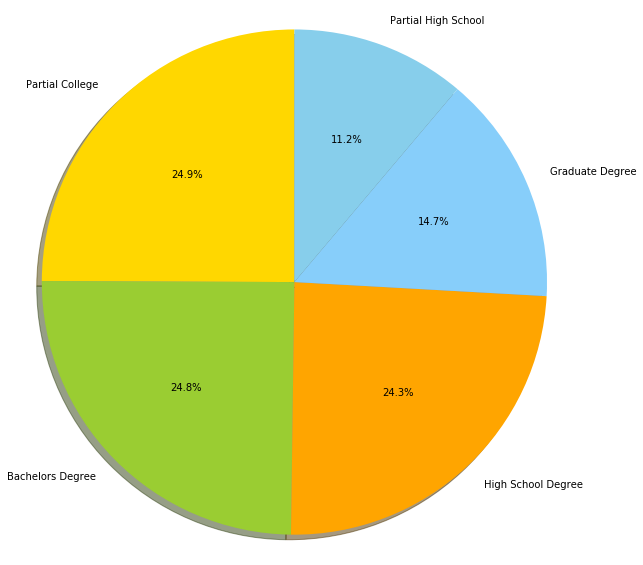

In [15]:
# df_education data to plot
labels = tuple(df_education.education_level)
sizes = df_education.total_employees.tolist()
colors = ['gold', 'yellowgreen', 'orange', 'lightskyblue', 'skyblue']
 
# Plot data in pie chart
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## Conclusion

This completes the introduction to PyDrill. As referenced in the beginning, you should now know how to do the following with PyDrill:
    
    * Connecting to PyDrill
    * Querying Tables
    * Filtering Tables
    * Self Joins
    * Aggregations
    * Transforming Data With Pandas
    * Plotting Results
    